In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [3]:
import os

In [4]:
new_path = r"C:\Users\carpa\Documents\GitHub\week5_project"

In [5]:
os.chdir(new_path)

In [6]:
df = pd.read_csv("Telco_customer_churn.csv")

In [7]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [8]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [9]:
df.select_dtypes("number").columns


Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')

In [22]:
#removing the string elements from the TotalCharges variable.
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.replace("$", "").str.replace(",", ""), errors='coerce')

In [23]:
#converting Total Charges to a float
df['TotalCharges'] = df['TotalCharges'].astype(float)

In [10]:
# Separating between discrete and continuous variables, as discrete ones could potentially be treated as categorical.
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 25]
potential_categorical_from_numerical

,SeniorCitizen
0,0
1,0
2,0
3,0
4,0
...,...
7038,0
7039,0
7040,0
7041,1


In [11]:
#Converting SeniorCitizen from integer to object(binary categorical variable)
df['SeniorCitizen'] = df['SeniorCitizen'].map({1: 'Yes', 0: 'No'})


In [12]:
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')


In [14]:
# Checking for missing data
df.isnull().sum().sort_values(ascending=False)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [26]:
#checking for duplicates
df.duplicated().sum()

np.int64(0)

In [27]:
df.duplicated().any()

np.False_

In [31]:
#Converting Churn to a binary variable
df['Churn_Binary'] = df['Churn'].map({'Yes': 1, 'No': 0})

In [98]:
#Overall churn rate for the company.
overall_churn= df['Churn_Binary'].mean() * 100

In [34]:
gender_churn = df.groupby('gender')['Churn_Binary'].mean() * 100
print(gender_churn)

gender
Female    26.920872
Male      26.160338
Name: Churn_Binary, dtype: float64


C:\Users\carpa\AppData\Local\Temp\ipykernel_22040\1204794789.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='Churn_Binary', data=df, estimator=np.mean, palette="Set3")


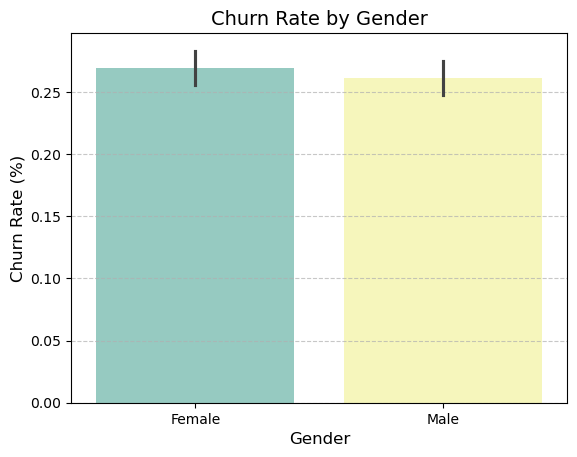

In [73]:
sns.barplot(x='gender', y='Churn_Binary', data=df, estimator=np.mean, palette="Set3")
plt.title('Churn Rate by Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)# Shows % churn
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

In [39]:
def churn_stats_by_gender(df):
    # Total customers per gender
    total_customers = df['gender'].value_counts()
    
    # Total churners per gender
    total_churners = df[df['Churn_Binary'] == 1]['gender'].value_counts()
    
    # Churn percentage
    churn_pct = (total_churners / total_customers) * 100
    
    return pd.DataFrame({
        'Total Customers': total_customers,
        'Total Churners': total_churners,
        'Churn Percentage (%)': churn_pct
    })

# Example usage:
stats = churn_stats_by_gender(df)
print(stats)

        Total Customers  Total Churners  Churn Percentage (%)
gender                                                       
Female             3488             939             26.920872
Male               3555             930             26.160338


In [40]:
contract_churn = df.groupby('Contract')['Churn_Binary'].mean() * 100
print(contract_churn)

Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn_Binary, dtype: float64


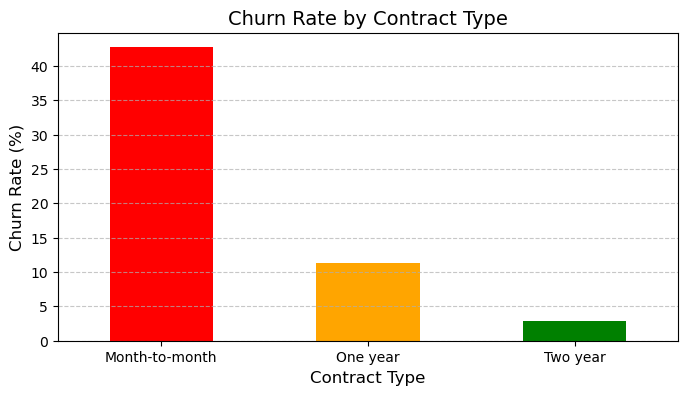

In [50]:
plt.figure(figsize=(8, 4))
contract_churn.plot(kind='bar', color=['red', 'orange', 'green'])
plt.title('Churn Rate by Contract Type', fontsize=14)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xticks(rotation=0)  # Horizontal x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

In [ ]:
# Insight: Month-to-month contracts seem to have higher churn than yearly contracts.(High-risk customer segment)

In [44]:
df["tenure"].sort_values(ascending=False).unique()

array([72, 71, 70, 69, 68, 67, 66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56,
       55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39,
       38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22,
       21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,
        4,  3,  2,  1,  0])

In [61]:
#Churn rate by tenure
#Bin tenure into 5 segments
bins = [0, 3, 6, 12, 24, 48, 72]
labels = ['0-3mo', '3-6mo', '6-12mo', '1-2y', '2-4y', '4-6y']
df['Tenure_Group'] = pd.cut(df["tenure"], bins=bins, labels=labels, include_lowest=True)

In [62]:
#Calculate churn rate by Tenure Group
Tenure_churn = df.groupby('Tenure_Group')['Churn_Binary'].mean() * 100
print(Tenure_churn)

Tenure_Group
0-3mo     56.214689
3-6mo     44.630072
6-12mo    35.886525
1-2y      28.710938
2-4y      20.388959
4-6y       9.513176
Name: Churn_Binary, dtype: float64


C:\Users\carpa\AppData\Local\Temp\ipykernel_22040\4286887493.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Tenure_churn = df.groupby('Tenure_Group')['Churn_Binary'].mean() * 100


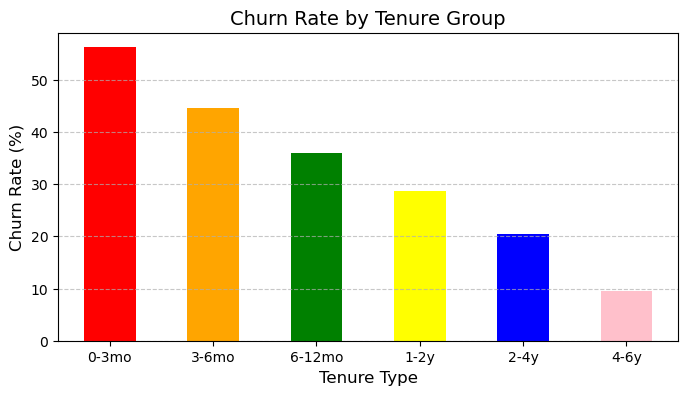

In [69]:
plt.figure(figsize=(8, 4))
Tenure_churn.plot(kind='bar', color=['red', 'orange', 'green', 'yellow','blue','pink'])
plt.title('Churn Rate by Tenure Group', fontsize=14)
plt.xlabel('Tenure Type', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xticks(rotation=0)  # Horizontal x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

In [ ]:
#Customers with a 0-3 month tenure have the highest churn rate which is 56.2 percent. Customers who have a tenure of more than 4 years have the lowest 
#churn rate, which seems to be 9.5 percent according to our data.

In [70]:
senior_churn = df.groupby('SeniorCitizen')['Churn_Binary'].mean() * 100
print(senior_churn)

SeniorCitizen
No     23.606168
Yes    41.681261
Name: Churn_Binary, dtype: float64


C:\Users\carpa\AppData\Local\Temp\ipykernel_22040\3426914258.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SeniorCitizen', y='Churn_Binary', data=df, estimator=np.mean, palette="Set3")


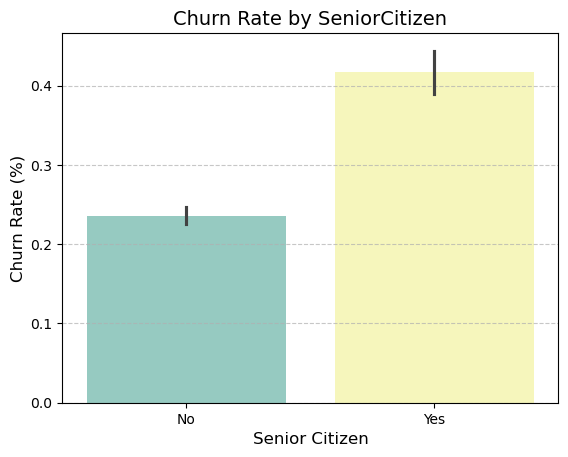

In [72]:
sns.barplot(x='SeniorCitizen', y='Churn_Binary', data=df, estimator=np.mean, palette="Set3")
plt.title('Churn Rate by SeniorCitizen', fontsize=14)
plt.xlabel('Senior Citizen', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)# Shows % churn
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

In [84]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(df['SeniorCitizen'], df['Churn_Binary'])


(np.float64(159.42630036838742), np.float64(1.510066805092378e-36))

In [ ]:
#Senior citizens are approx 2x more likely to churn than non-seniors indicating a retention issue among senior customers.
#Seniors and 0-3 month tenure customers are the high-risk customer segments.

In [ ]:
df['TechSupport'].unique()

In [77]:
#Filtering the customers who have no internet, since TechSupport is not relevant for them.
df_internet = df[df['TechSupport'] != 'No internet service']

In [78]:
tech_support_churn = df_internet.groupby('TechSupport')['Churn_Binary'].mean() * 100
print(tech_support_churn)

TechSupport
No     41.635474
Yes    15.166341
Name: Churn_Binary, dtype: float64


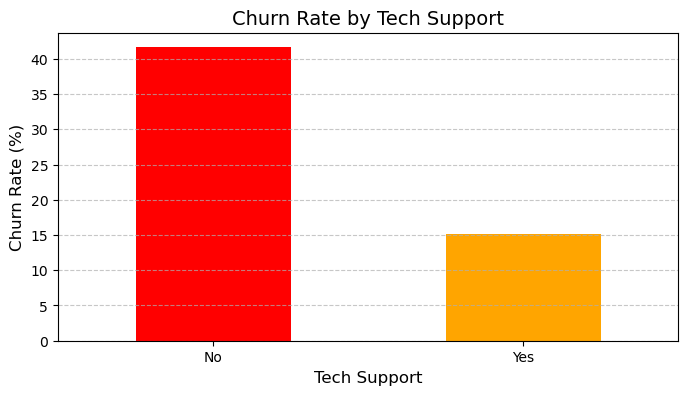

In [79]:
plt.figure(figsize=(8, 4))
tech_support_churn.plot(kind='bar', color=['red', 'orange'])
plt.title('Churn Rate by Tech Support', fontsize=14)
plt.xlabel('Tech Support', fontsize=12)
plt.ylabel('Churn Rate (%)', fontsize=12)
plt.xticks(rotation=0)  # Horizontal x-axis labels
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show();

In [83]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(
    df_internet['TechSupport'], 
    df_internet['Churn_Binary']
)
chi2, p_value, _, _ = chi2_contingency(contingency_table)
chi2, p_value

(np.float64(414.2515690453345), np.float64(4.35191667899426e-92))

In [ ]:
#p-value is <0.05, there is enough evidence for a significant association between receiving technical support and churn rate. 
#Customers who receive technical support are 2.7x less likely to churn suggesting an effective method for retaining customers. 

In [89]:
#Loop for checking the unique values for the rest of the categorical variables
categorical_vars = [
    'Partner',           # Yes/No
    'Dependents',        # Yes/No
    'PhoneService',      # Yes/No
    'InternetService',   # DSL/Fiber/No
    'PaperlessBilling',  # Yes/No
    'PaymentMethod'      # Electronic check/Mailed check/etc.
]

In [91]:
for var in categorical_vars:
    # Calculate mean churn rate per category (convert to percentage)
    churn_rates = df.groupby(var)['Churn_Binary'].mean() * 100
    
churn_rates

PaymentMethod
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Electronic check             45.285412
Mailed check                 19.106700
Name: Churn_Binary, dtype: float64

In [ ]:
#How do customer tenure and contract length interact to influence churn?

In [92]:
grouped = df.groupby(['Tenure_Group', 'Contract'])['Churn_Binary'].mean() * 100
print(grouped.unstack())

Contract      Month-to-month   One year  Two year
Tenure_Group                                     
0-3mo              58.048780   9.523810  0.000000
3-6mo              47.680412  11.111111  0.000000
6-12mo             41.996558  10.588235  0.000000
1-2y               37.720488   8.121827  0.000000
2-4y               32.917706  10.617761  2.189781
4-6y               26.023392  12.933754  3.325416


C:\Users\carpa\AppData\Local\Temp\ipykernel_22040\343475887.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby(['Tenure_Group', 'Contract'])['Churn_Binary'].mean() * 100


In [ ]:
#Insight: Short-tenure + month-to-month contracts have the highest churn. (58 percent).
#Tenure and contract length interactively influence churn. 
#Short-tenure customers on flexible plans need urgent attention, while long-term contracts stabilize retention.

C:\Users\carpa\AppData\Local\Temp\ipykernel_22040\2631047984.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(index='Tenure_Group', columns='Contract', values='Churn_Binary', aggfunc='mean') * 100


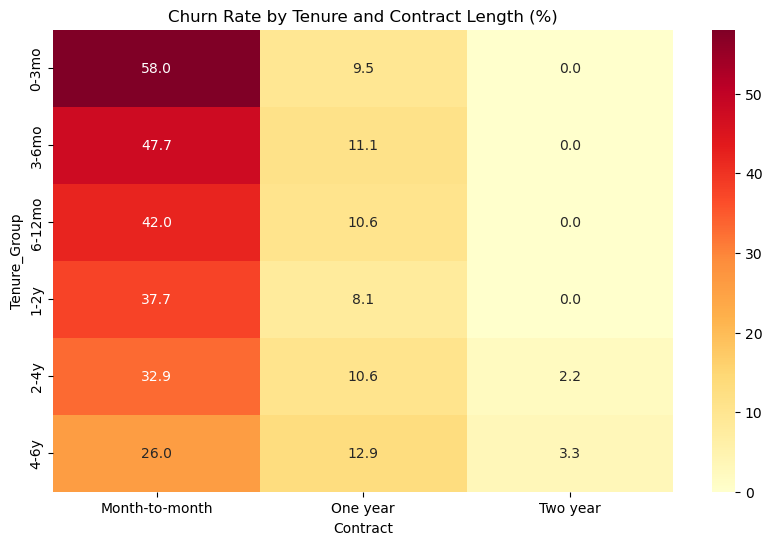

In [94]:
# Pivot table for heatmap
pivot = df.pivot_table(index='Tenure_Group', columns='Contract', values='Churn_Binary', aggfunc='mean') * 100

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Churn Rate by Tenure and Contract Length (%)')
plt.show()

In [96]:
grouped = df.groupby(['SeniorCitizen', 'gender'])['Churn_Binary'].mean() * 100
print(grouped.unstack())

gender            Female       Male
SeniorCitizen                      
No             23.938356  23.280778
Yes            42.253521  41.114983


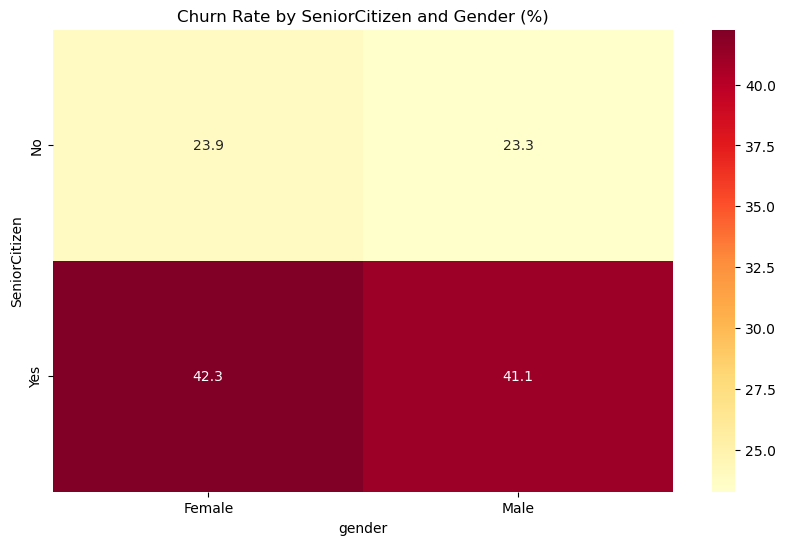

In [97]:
# Pivot table for heatmap
pivot = df.pivot_table(index='SeniorCitizen', columns='gender', values='Churn_Binary', aggfunc='mean') * 100

# Plot
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='.1f', cmap='YlOrRd')
plt.title('Churn Rate by SeniorCitizen and Gender (%)')
plt.show()

In [ ]:
#Insight: Gender doesn't really play a role in churn rates.

In [99]:
pivot_table.loc['Overall'] = overall_churn

NameError: name 'pivot_table' is not defined